### <span style="color:pink; font-weight:bold"> CURSO - Data Science: dados e visualizações</span>

#### <span style="color:pink; font-weight:bold"> Importando dados</span>

In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
# importando os dados utilizando a biblioteca pandas
import pandas as pd

notas = pd.read_csv("/home/ba/Documentos/data-science/ratings.csv")
notas.head()



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# uma das maneiras de saber quantas avaliações existem é pedir o formato da tabela com notas.shape
notas.shape

(100836, 4)

Alterando os nomes das colunas para português:

In [7]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

Consultando todos os dados da coluna notas:

In [8]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Agora, vemos os dados em uma única coluna, sendo uma série de números que chamamos de Pandas Series

Utilizando "unique()" vemos quais são os valores colocados nesta coluna de maneira única

In [9]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Através do pandas é possível fazer a leitura e escrita de um conjunto de dados de diversas maneiras, além disso, extrair informações a partir desses dados.

In [10]:
# quantas vezes uma nota específica aparece nesta coluna, ordenadas de forma decrescente

notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [11]:
# encontrando a média dessas notas:

notas['nota'].mean()

3.501556983616962

#### <span style="color:pink; font-weight:bold"> Explorando os dados de maneira visual com histograma e boxplot</span>

O pandas possui um método plot() justamente para plotar dados.

In [12]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<Axes: >

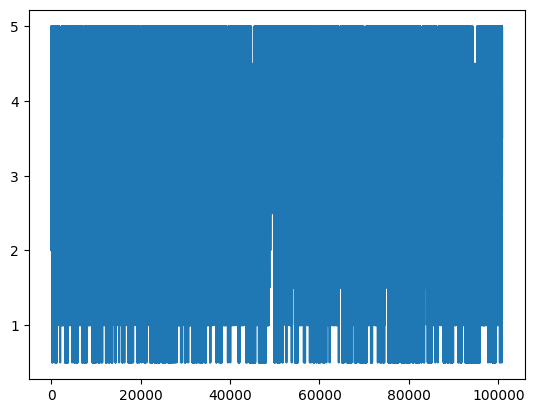

In [13]:
notas.nota.plot()

O gráfico plot() de uma série cruza índices da tabela com valores da coluna que apontamos, criando pontos para cada resultado.  
Todos os pontos sçao ligados por reta, por isso, o gráfico fica inelegível.

Queremos saber quantas vezes cada informação aparece nesse conjunto de dados. Visualizamos isso em um histograma usando o argumento kind com o valor hist

<Axes: ylabel='Frequency'>

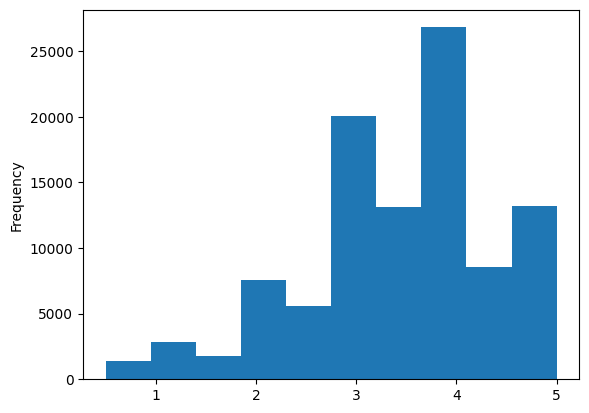

In [14]:
notas.nota.plot(kind='hist')

Para saber exatamente qual valor divide nossos dados na metade , calculamos a mediana.  
É possível imprimir tanto a média quanto a mediana na tela da seguinte forma:

In [15]:
print("Média",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


Utilizando o describe() é possível obter outros valores além da média e da mediana

In [16]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Dessa forma, sabemos que temos 100.836 dados; a média das notas é 3.501557; o valor mínimo é 0,5; o máximo é 5; a mediana é 3.5; 25% dos dados (um quartil) estão abaixo de 3; e outros 25% estão acima de 4.

In [17]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Outra visualização que nos permite analisar esses dados é o boxplot, que descreve em uma espécie de "caixa" a posição dos valores plotados. 

<Axes: xlabel='nota'>

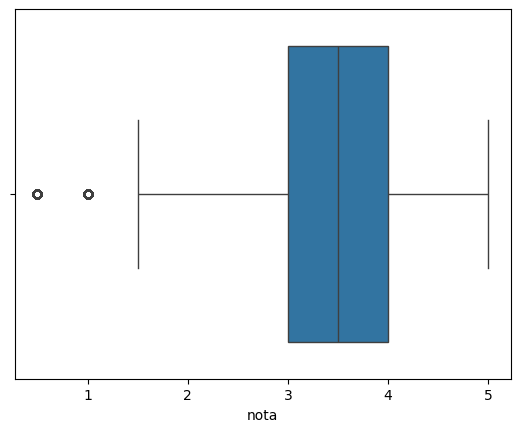

In [18]:
import seaborn as sns

sns.boxplot(x=notas.nota)

A mediana está representada no meio do retângulo azul — ou seja, no 3,5, dividindo, em duas partes, 50% dos dados (entre 3 e 3,5, e entre 3,5 e 4. Outros 25% dos nossos dados estão entre 4 e 5, e o restante está abaixo de 3.

Através dessas análises, extraímos algumas informações, como que metade dos usuários (uma parcela muito grande!) deu avaliações entre 3 e 4, e que as notas entre 0,5 e 1,5 figuram pouco significativamente nessa amostra.

#### <span style="color:pink; font-weight:bold"> Análise exploratória de dados</span>

In [19]:
filmes = pd.read_csv('/home/ba/Documentos/data-science/movies.csv')

filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
filmes.columns = ["filmeId", "titulo", "generos"]

In [21]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [22]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### <span style="color:pink; font-weight:bold"> Analisando algumas notas específicas</span>

Através de uma query é possível cruzar informações entre os data frames notas e filmes.  
É possível fazer isso criando uma query, comparando o valor 1, que corresponde ao filme "toy story" com a coluna filmeId do data frame notas

In [25]:
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [27]:
notas.query("filmeId==1").nota.mean()  # média do filme do toy story

3.9209302325581397

In [31]:
notas.query("filmeId==2").nota.mean() # média do filme jumanji

3.4318181818181817

Agora vamos pegar todo o dataframe a agrupar pela coluna filmeId

In [33]:
notas.groupby("filmeId").mean()  #agrupado por filme e feito a média

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Como não faz sentido tirar a média do usuario Id e o momento, vamos extrair apenas a coluna nota:

In [37]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]  # quando extraímos uma coluna ele devolve uma série
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Agora vamos plotar essas notas em um gráfico para visualizar melhor:

<Axes: ylabel='Frequency'>

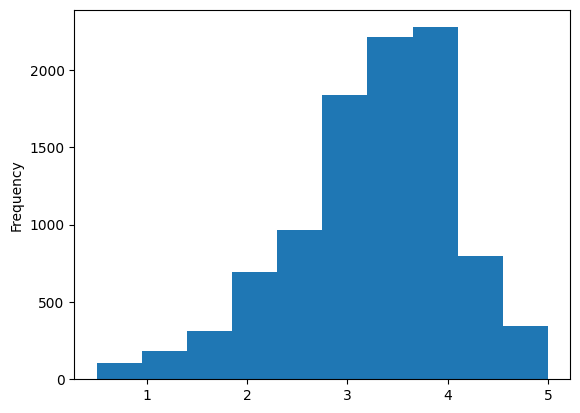

In [40]:
medias_por_filme.plot(kind='hist') #como se distribuem as médias dos filmes

Além do pandas podemos utilizar outras bibliotecas gráficas

<Axes: xlabel='nota'>

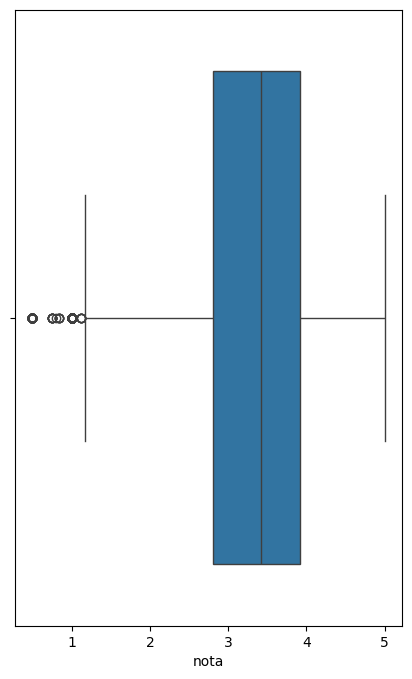

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(x=medias_por_filme)

Lembrando que pra analisar melhor os valores do boxplot usamos o describe

In [43]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

O pandas também é capaz de fazer box plot, assim como o seaborn também é capas de fazer gráficos de histograma

/tmp/ipykernel_5704/4045850242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10) #bins escolhe quantas caixinhas vou separar meus dados, porém é necessário ter cuidado


<Axes: xlabel='nota', ylabel='Density'>

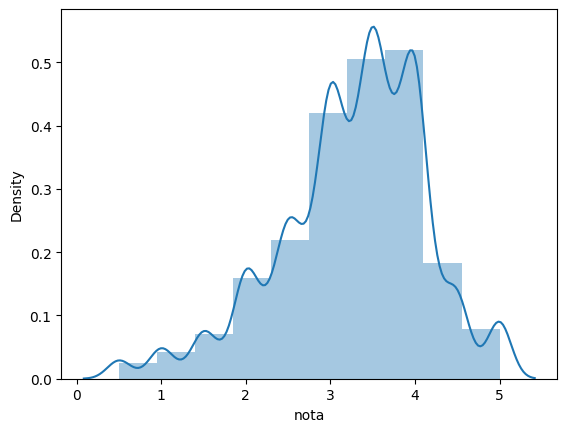

In [47]:
sns.distplot(medias_por_filme, bins=10) #bins escolhe quantas caixinhas vou separar meus dados, porém é necessário ter cuidado

A biblioteca que o panda e o seaborn usa para gerar esses gráficos é a matplotlib, é possível importá-la e utilizar a função plt.hist() para plotar nosso histograma na tela:

Text(0.5, 1.0, 'Histograma da média dos filmes')

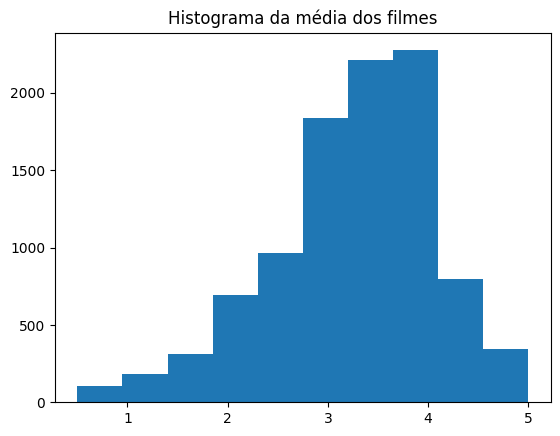

In [51]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma da média dos filmes")

#### <span style="color:pink; font-weight:bold"> Tipos de variáveis</span>

In [4]:
import pandas as pd
tmdb = pd.read_csv("/home/ba/Documentos/data-science/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Ao analisar as linguas, percebemos que ela não tem uma ordem de prioridades, não há uma lingua maior que a outra. Logo, chamamos de variáveis categóricas nominais.

In [5]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Uma variável categórica que pode ter ordem de prioridade seria o nível de escolaridade. Sendo uma variável categórica ordinal. não tem como fazer operação aritmetica como a soma.

Já variáveis como orçamento "budget", uma variável quantitativa e contínua, pois podem ser infinitos valores

Também existem os casos, que tem intervalos, como a quantidade de votos. É quantitativa existe uma ordem e um intervalor, e as distâncias são iguais (1, 2, 3, 4).
As notas também tem intervalos de 0.5

#### <span style="color:pink; font-weight:bold"> Data Visualization</span>

##### <span style="color:pink; font-weight:bold"> Visualizando gráficos por categorias</span>

Como poderíamos extrair informações de uma variável categórica?

In [8]:
tmdb["original_language"].value_counts().index #mostrando apenas o índice através do index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [10]:
tmdb["original_language"].value_counts().values #mostrando apenas os valores

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

Ná prática coluna mesmo é só uma, a de valores. Por isso que chamamos de série o value.counts()

In [11]:
tmdb["original_language"].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [14]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index() #to_frame transforma em um dataframe, reset_index() retira o indice
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


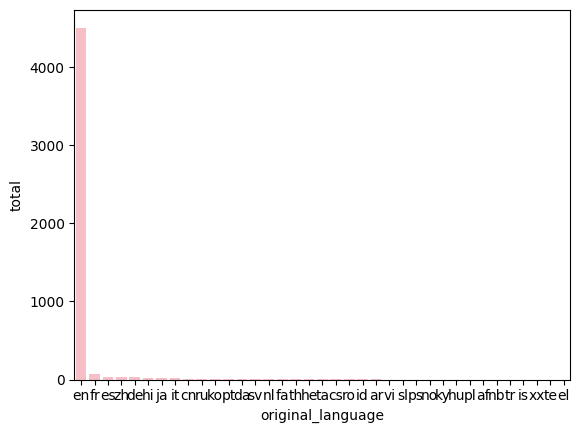

In [25]:
# visualizar isso através de um gráfico (plot de categorias)
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#FFB6C1", "#FFD700", "#98FB98", "#87CEFA", "#FFA07A"]
sns.set_palette(sns.color_palette(colors)) #defini uma paleta colorida

sns.barplot(x="original_language", y="total", data = contagem_de_lingua)
plt.show()


Além de plotagens de "baixo nível" como essa, pois exigiu inúmeras operações até chegar a este resultado, também temos as de mais alto nível como catplot(), que realiza plotagem baseada em categorias.

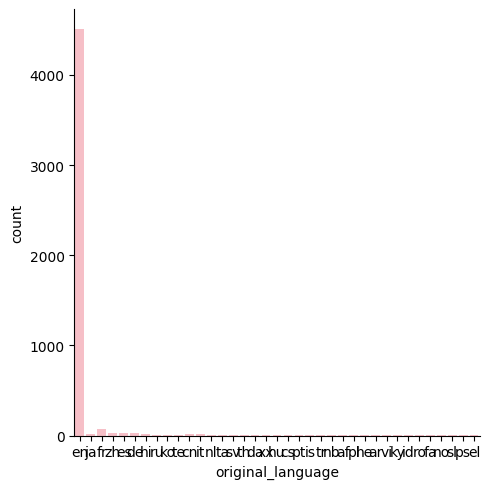

In [27]:
sns.catplot(x="original_language", kind="count", data=tmdb)

Percebemos que esse gráfico não mostra as informações de uma forma muito clara, como melhoramos isso? Data visualization é uma area em ciência de dados que busca determinar qual o melhor tipo de gráfico é o melhor dependendo da circunstância. No caso acima, podemos utilizar o gráfico de torta "pie" que tem na biblioteca matplotlib para analisar se é uma boa opção.

([<matplotlib.patches.Wedge at 0x7f7e77509650>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

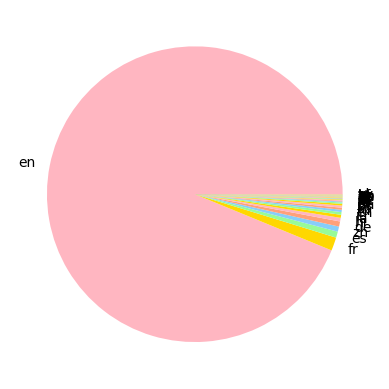

In [29]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

Vemos que não foi uma boa escolha, não facilitou a visualização, o gráfico de pizza não costuma ser recomendado, afinal, a olho nu, é muito difícil entender as diferenças proporcionais entre as áreas de cada fatia. 

Nos dados, a linguagem "inglês" tem um destaque em relação as outras linguas. Para expressar essa informação podemos estabelecer uma comparação entre o inglês e todas as outras linguas

In [36]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"] # localizando as linhas que o índice tem o valor en
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


Agora vamos criar um dataframe bonito, para plotar e conseguirmos visualizar

In [41]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados) #criando o dataframe
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

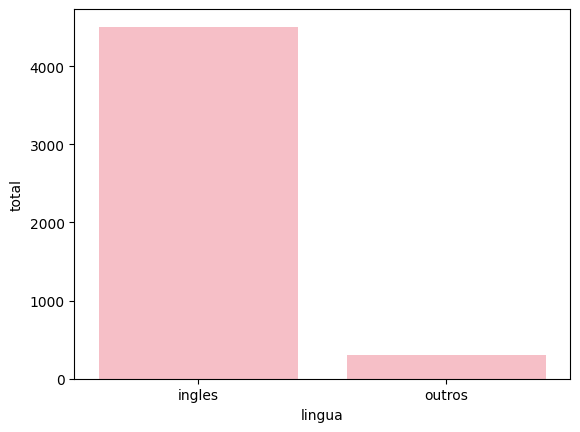

In [42]:
sns.barplot(x="lingua", y="total", data = dados)

Nesses gráficos enfatizamos que a quantidade de filmes na lingua inglesa é superior as demais, no gráfico de barras, é até possível assumirmos que a coluna "inglês" é cerca de dez vezes maior que a coluna "outros" — uma diferença de grandeza pouco perceptível no gráfico de pizza. mas agora vamos visualizar em um gráfico com estão as outras linguas. Então, vamos remover dos dados todos os elementos que não compartilham a lingua inglesa.

([<matplotlib.patches.Wedge at 0x7f7e774d0c50>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

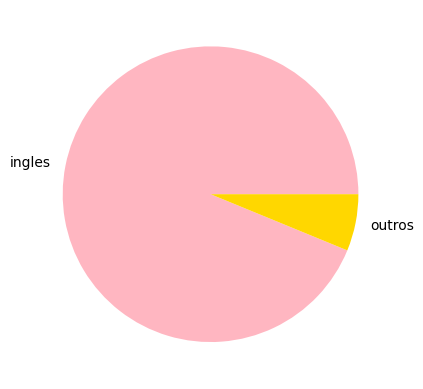

In [43]:
plt.pie(dados["total"], labels = dados["lingua"])

In [49]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

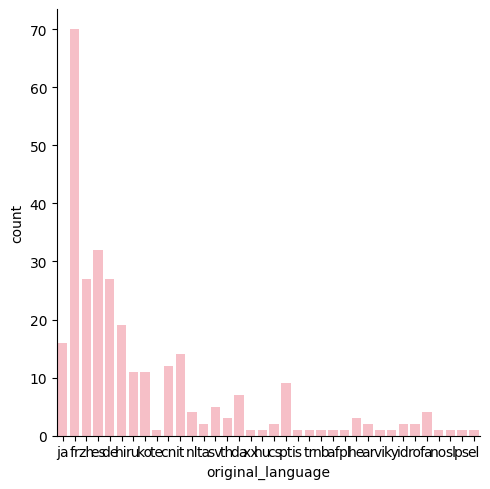

In [66]:
filmes_sem_lingua_original_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_ingles)